local


<Axes: >

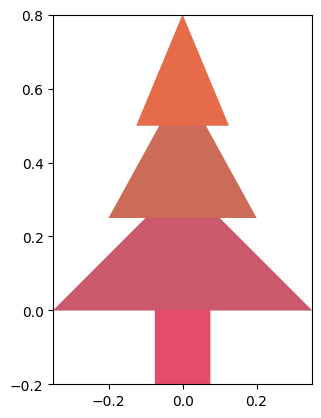

In [8]:
import sys
sys.path.append('/mnt/d/packing/code/core/')
import kaggle_support as kgs
import importlib
import pack_vis
importlib.reload(kgs)
pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

(0.11498678077235021, array(0.11498678))

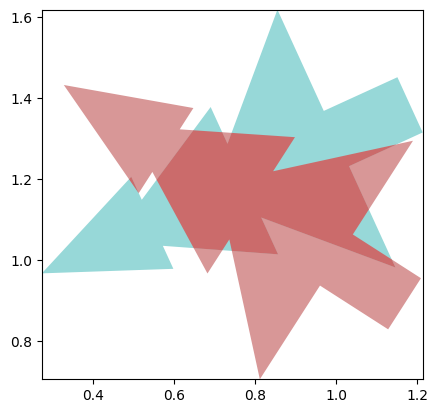

In [9]:
import pack_cuda
import cupy as cp
import shapely
importlib.reload(pack_cuda)
tree_list = kgs.TreeList()
tree_list.xyt = [[1.,1.,1.],[1.,1.3,2.]]
trees = tree_list.get_trees()
pack_vis.visualize_tree_list(tree_list)
shapely.intersection(trees[0], trees[1]).area, pack_cuda.overlap_two_trees(cp.array(tree_list.x[0]), cp.array(tree_list.y[0]), cp.array(tree_list.theta[0]),
                                  cp.array(tree_list.x[1]), cp.array(tree_list.y[1]), cp.array(tree_list.theta[1]))

TypeCheckError: argument "xyt" (numpy.ndarray) is not an instance of cupy.ndarray

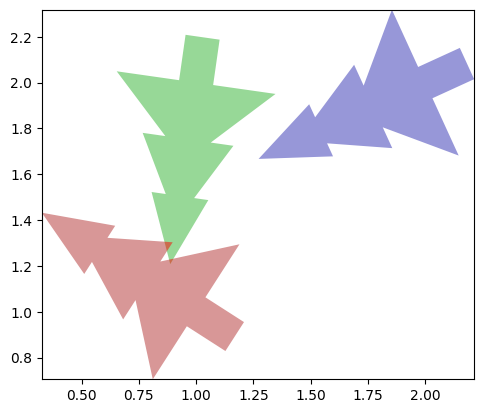

In [10]:
import pack_basics
import pack_vis
importlib.reload(pack_basics)
importlib.reload(pack_vis)
tree_list = pack_basics.place_random(10, 2)
tree_list.xyt = [[1.,1.,1.],[1.,2,3.],[2.,2.,2.]]
pack_vis.visualize_tree_list(tree_list)
import pack_cost
importlib.reload(pack_cost)
cost = pack_cost.PackingCost()
cost.collision_cost = pack_cost.CollisionCostOverlappingArea()
total_cost, total_grad = cost.compute_total_cost_ref(tree_list.xyt, include_gradients=True)
total_cost, total_grad